264


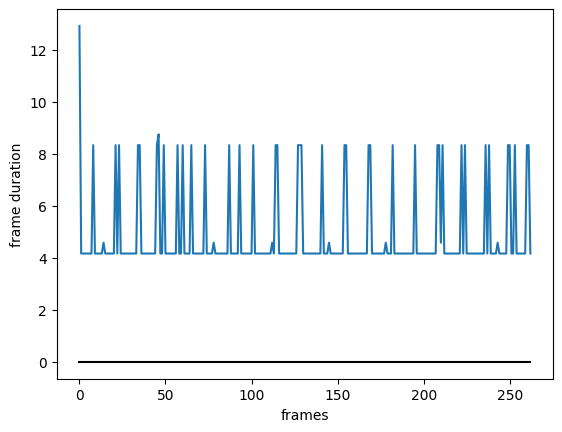

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

video_path = './data/IMG_9671.mov'

cap = cv2.VideoCapture(video_path)


frames = []
frame_no = 0
while(cap.isOpened()):
    frame_exists, curr_frame = cap.read()
    if frame_exists:
        frames.append([frame_no, cap.get(cv2.CAP_PROP_POS_MSEC)])
        # print("for frame : " + str(frame_no) + "   timestamp is: ", str(cap.get(cv2.CAP_PROP_POS_MSEC)))
    else:
        break
    frame_no += 1

cap.release()

frames = np.array(frames)
# plt.plot(frames[:,0], frames[:,1])
plt.plot(frames[:-1,0], np.diff(frames[:,1]))
plt.plot(frames[:-1,0], np.zeros_like(frames[:-1,0]), 'k')
plt.xlabel('frames')
plt.ylabel('frame duration')

print(len(frames))

Text(0, 0.5, 'frame duration')

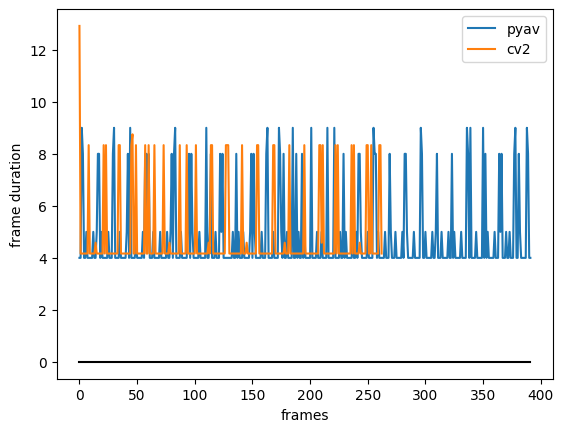

In [7]:
import av
import time
import matplotlib.pyplot as plt
import numpy as np



start = time.process_time()
index=0


container = av.open(video_path)
video = container.streams.get(index)[0]

if video.type != "video":
    raise ValueError(
        f'The index {index} is not a video stream. It is an {video.type} stream.'
    )

av_timestamps = [
    int(packet.pts * video.time_base * 1000) for packet in container.demux(video) if packet.pts is not None
]

container.close()
av_timestamps.sort()


frames_av = []

for i in range(len(av_timestamps)):
    frames_av.append([i, av_timestamps[i]-av_timestamps[0]])
frames_av = np.array(frames_av)

# plt.plot(frames_av)
plt.plot(frames_av[:-1,0], np.diff(frames_av[:,1]), label='pyav')
plt.plot(frames_av[:-1,0], np.zeros_like(frames_av[:-1,0]), 'k')

plt.plot(frames[:-1,0], np.diff(frames[:,1]), label='cv2')
plt.legend()

plt.xlabel('frames')
plt.ylabel('frame duration')

In [9]:
len(frames_av)

393

In [9]:
np.mean(np.diff(frames[:,1]))

33.36666666666667

In [19]:
len(av_timestamps)

316